# ANÁLISIS EXPLORATORIO Y PREPROCESAMIENTO

# Carga de las bibliotecas y los datos

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.impute import KNNImputer

In [18]:
data = pd.read_csv("../Data/CC GENERAL.csv", sep=',', index_col='CUST_ID')
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


# Análisis descriptivo

Número y tipo de variables que conforman el dataframe.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

Obtención de un resumen estadístico por columna.

In [20]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Lista en orden descendente del numero de datos faltantes por variable.

In [21]:
data.isnull().sum(axis=0).sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
TENURE                                0
dtype: int64

# Análisis gráfico

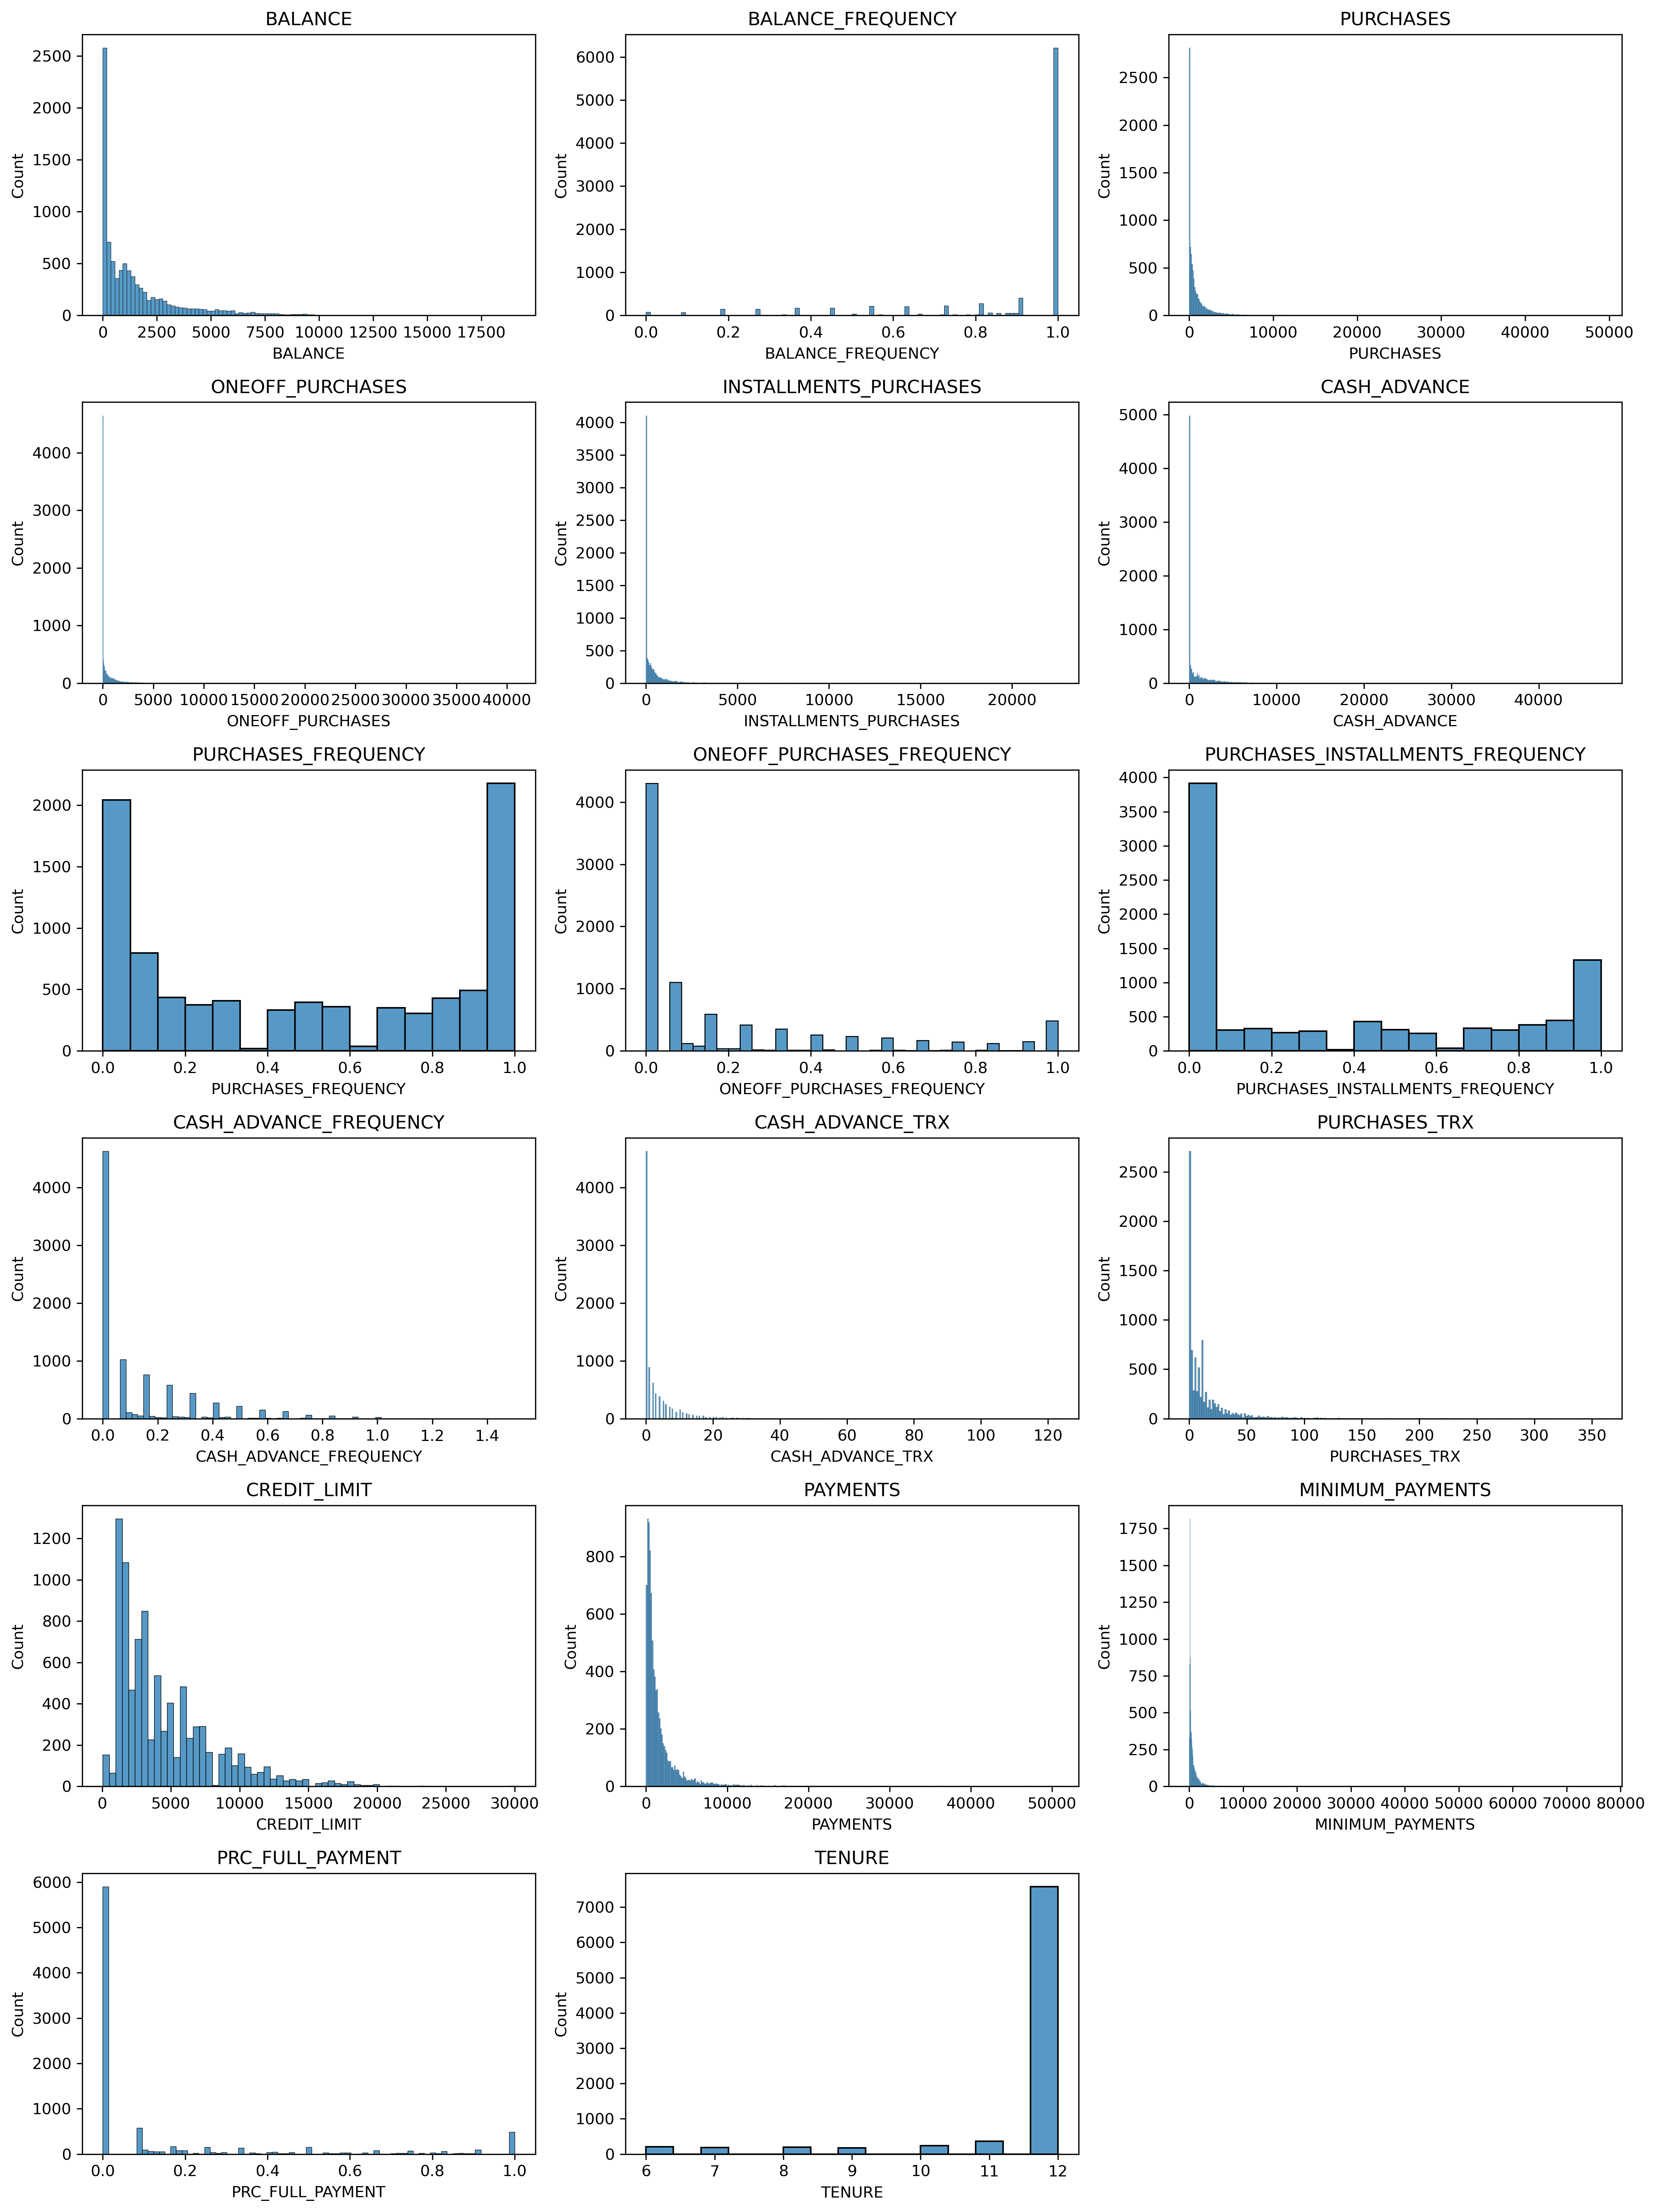

In [ ]:
def hist(columns, x):
    plt.figure(figsize=(15, 20), dpi=300)
    i = 0

    for col in columns:
        i += 1
        plt.subplot(6, 3, i)  
        sns.histplot(data=x, x=col)
        plt.title(col)

    plt.tight_layout()
    plt.show()
    
hist(data.columns, data)

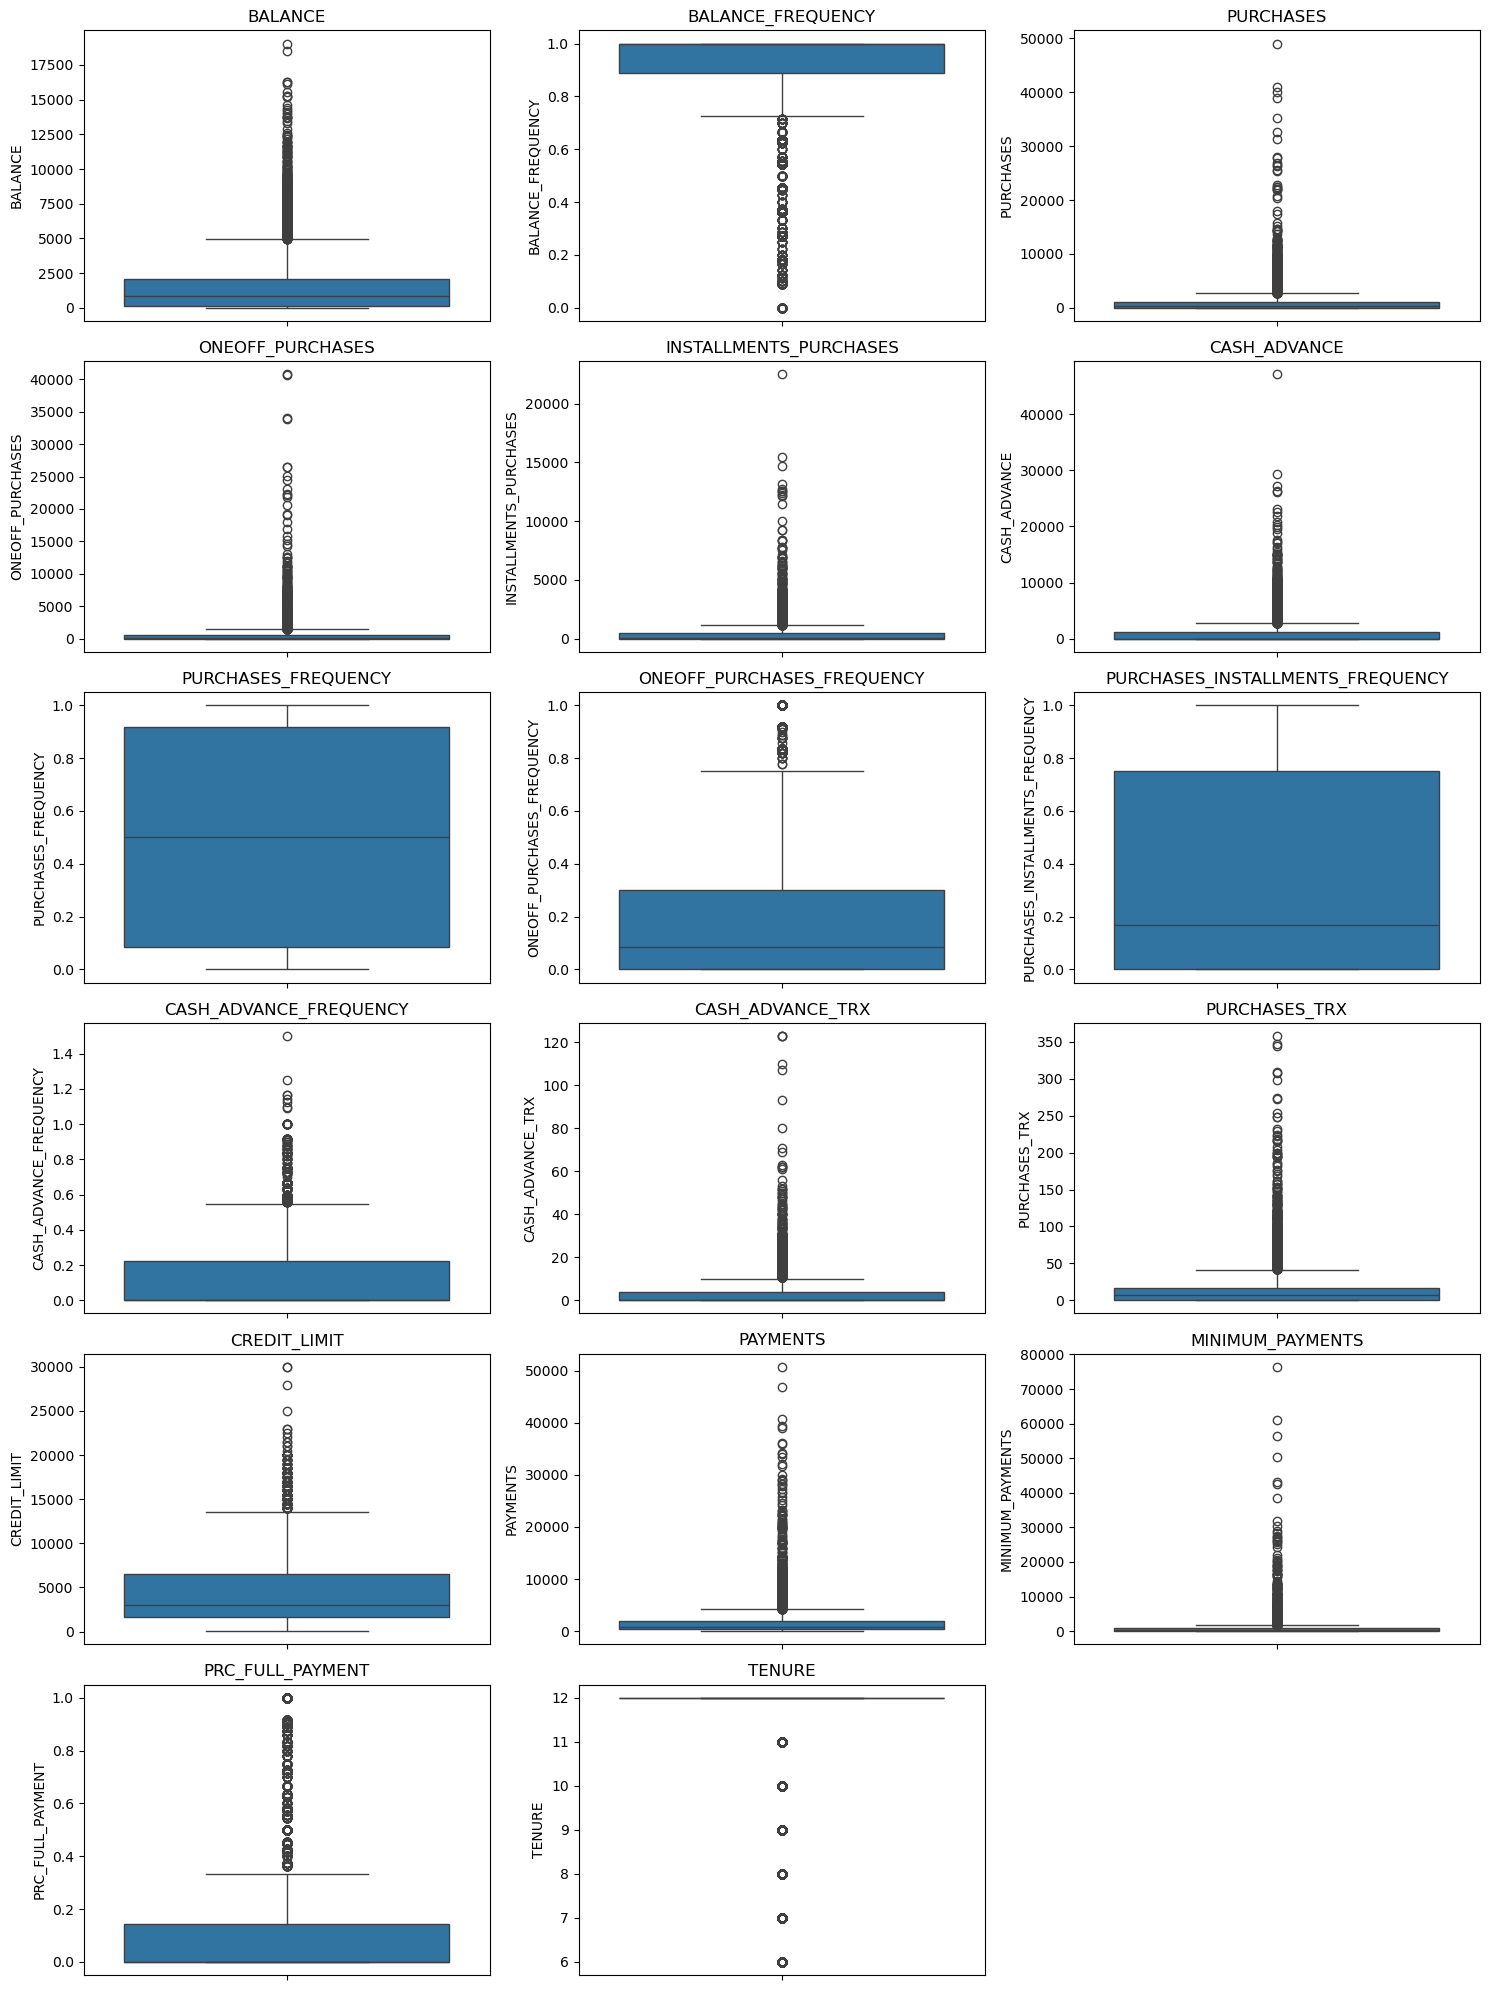

In [ ]:
def boxp(columns, x):
    
    plt.figure(figsize=(15, 20))
    i = 0

    for col in columns:
        i += 1
        plt.subplot(6, 3, i)  
        sns.boxplot(data=x, y=col)
        plt.title(col)

    plt.tight_layout()
    plt.show()

boxp(data.columns, data)

Los histogramas y gráficos de caja muestran que la mayoría de las variables tienen distribuciones continuas.

Exceptuando PURCHASES_FREQUENCY y PURCHASES_INSTALLMENTS_FREQUENCY, todas las variables presentan valores atípicos. Estos outliers, en su mayoría, provienen de distribuciones sesgadas hacia la derecha, lo que indica la presencia de muchos valores pequeños y algunos excepcionalmente grandes

# Imputación de valores faltantes

En este caso, la imputación de valores faltantes utilizando la media no es la opción ideal debido a la  alta proporción de valores atípicos. Si bien la mediana podría ser más adecuada al ser robusta frente a distribuciones sesgadas, se decidió emplear imputación basada en KNN (K-Nearest Neighbors), utilizando los 5 vecinos más cercanos según la distancia euclidiana. Este enfoque permite capturar patrones más complejos en los datos.

In [24]:
df_escalados = preprocessing.StandardScaler().fit_transform(data)
imputados = KNNImputer(n_neighbors=5, weights="uniform").fit_transform(df_escalados)
df_escalados = preprocessing.StandardScaler().fit_transform(imputados)
datos_imputados = pd.DataFrame(imputados, columns=data.columns, index=data.index)

# Exportación del dataframe escalado como archivo CSV

In [25]:
datos_imputados.to_csv('../Data/escalados.csv')

# Consideraciones adicionales

Para este proyecto, se decidió conservar los valores atípicos bajo la premisa de que podrían contener información relevante, a pesar de que algunos algoritmos de agrupamiento pueden ser sensibles a su presencia.

Durante el desarrollo del proyecto, se experimentó aplicando transformaciones Box-Cox para normalizar las variables con outliers. Sin embargo, los coeficientes de silueta no mostraron mejoras significativas, y los clusters presentaron mayor solapamiento, descartándose esta alternativa.

Otras opciones incluyen eliminar, winsorizar o imputar outliers, pero en este caso, se priorizó su posible valor informativo.
